In [9]:
import pytesseract

In [10]:
import cv2 # pip install opencv-python

In [11]:
import matplotlib.pyplot as plt

#config

In [12]:
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [13]:
img = cv2.imread('font.jpg')

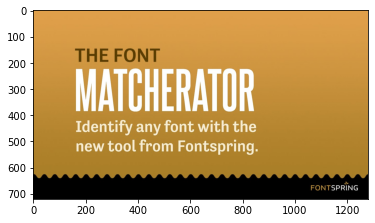

In [14]:
plt.imshow(img)

In [15]:
img2char = pytesseract.image_to_string(img)
with open('file.txt', mode = 'w') as f:
    f.write(img2char)

In [16]:
print(img2char)

THE FONT

MATCHERATOR

Identify any font with the
new tool from Fontspring.

FONTSPRING



In [17]:
imgbox = pytesseract.image_to_boxes(img)

In [18]:
print(imgbox)

T 161 523 199 573 0
H 206 523 244 573 0
E 256 523 288 573 0
F 312 523 343 573 0
O 348 522 392 574 0
N 401 523 440 573 0
T 447 523 485 573 0
M 164 335 240 496 0
A 249 335 310 496 0
T 308 335 360 496 0
C 366 333 416 497 0
H 428 335 479 496 0
E 493 335 538 496 0
R 548 335 603 496 0
A 608 335 670 496 0
T 668 335 720 496 0
O 725 333 777 497 0
R 790 335 845 496 0
I 165 255 184 297 0
d 188 255 216 300 0
e 222 255 249 287 0
n 255 255 281 287 0
t 272 242 295 301 0
i 286 255 323 300 0
f 328 255 354 301 0
y 352 242 381 286 0
a 395 255 424 287 0
n 429 255 455 287 0
y 460 242 488 286 0
f 502 255 528 301 0
o 526 255 554 287 0
n 560 255 586 287 0
t 591 255 615 296 0
w 629 255 673 286 0
i 678 255 686 300 0
t 691 255 716 296 0
h 721 255 747 300 0
t 764 255 788 296 0
h 793 255 819 300 0
e 825 255 852 287 0
n 166 181 192 213 0
e 198 181 225 213 0
w 228 181 272 212 0
t 285 181 310 222 0
o 313 181 341 213 0
o 329 164 358 231 0
l 346 181 374 213 0
f 407 181 432 227 0
r 433 181 455 213 0
o 458 181 486 213 0


In [19]:
imgH, imgW,_ = img.shape

In [20]:
for boxes in imgbox.splitlines():
    boxes = boxes.split(' ')
    x,y,w, h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
    cv2.rectangle(img, (x,imgW-y), (w,imgH-h), (0,0,255),3)

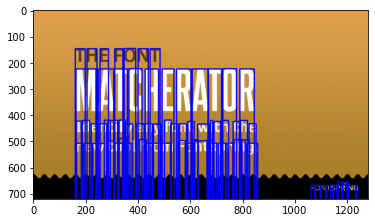

In [21]:
plt.imshow(img) ## by default cv2=> BGR

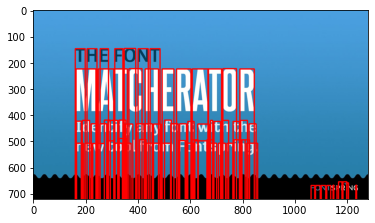

In [22]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#webcam

In [23]:
font_scale = 1.5

In [24]:
font = cv2.FONT_HERSHEY_PLAIN

In [ ]:
cap = cv2.VideoCapture()

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open")

cntr =0;
while True:
    ret,frame = cap.read()
    cntr = cntr+1;
    if((cntr%20)==0):
        
        imgH, imgW,_ = frame.shape
        
        x1,y1,w1,h1 = 0,0,imgH,imgW
        
        imgchar = pytesseract.image_to_string(frame)
        
        imgboxes = pytesseract.image_to_boxes(frame)
        for boxes in imgboxes.splitlines():
            boxes = boxes.split(' ')
            x,y,w, h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
            cv2.rectangle(img, (x,imgW-y), (w,imgH-h), (0,0,255),3)
        
        cv2.putText(frame, imgchar, (x1 + int(w1/50),y1 + int(h1/20)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)
        
        with open('file.txt', mode = 'w') as f:
            f.write(imgchar)
            
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        cv2.imshow('Live Webcam OCR', frame)
        
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()